<a href="https://colab.research.google.com/github/eliba12/Introduction-to-Deep-Learning-Neural-Networks-with-Keras/blob/main/Classification_Models_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Models with Keras¶
Objective for this Notebook
1. Use of MNIST database for training various image processing systems
2. Build a Neural Network
3. Train and Test the Network.

* Import Keras and Packages
* Build a Neural Network
* Train and Test the Network

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6
#!pip install matplotlib==3.5.0

import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [ ]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

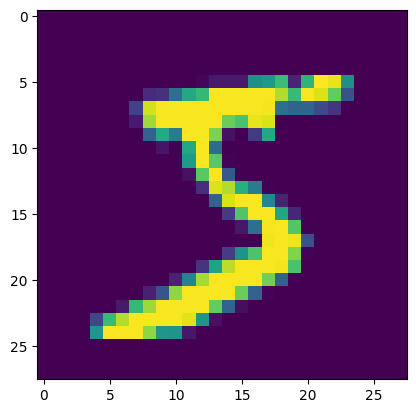

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [ ]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [ ]:
## Train and Test the Network
model = classification_model()

#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2 )

# evalute the model
scores = model.evaluate(X_test, y_test, verbose=0 )

Epoch 1/10
1875/1875 - 31s - loss: 0.1845 - accuracy: 0.9448 - val_loss: 0.0993 - val_accuracy: 0.9698 - 31s/epoch - 16ms/step
Epoch 2/10
1875/1875 - 19s - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0808 - val_accuracy: 0.9753 - 19s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 18s - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.0810 - val_accuracy: 0.9754 - 18s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 26s - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0564 - val_accuracy: 0.9829 - 26s/epoch - 14ms/step
Epoch 5/10
1875/1875 - 25s - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0663 - val_accuracy: 0.9821 - 25s/epoch - 13ms/step
Epoch 6/10
1875/1875 - 21s - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0745 - val_accuracy: 0.9809 - 21s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 22s - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0754 - val_accuracy: 0.9811 - 22s/epoch - 12ms/step
Epoch 8/10
1875/1875 - 28s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0862 - val_accuracy: 0.9773 - 28s/ep

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1],1 - scores[1]))

Accuracy: 0.9775000214576721% 
 Error: 0.02249997854232788


In [ ]:
model.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')